#                                            Lending Club Case Study

# The main purpose of this notefbook is to clearly explains the thought process behind Lending_club Case analysis 


This notebook is divided into following sections :

1) Data Understanding : For identifying Data quality issues
                      : Correct Interpretation of variable meanings
2) Data Cleaning and Manipulation : Addressing Data Quality Issues like missing value imputation, outlier treatment and other
                                    kinds of data redundancies.
                                    Converting Data to a suitable convinient format
                                    Manipulation of string and dates
3) Data Analysis : Right problem is solved which is coherent with the needs of the business
                 : Perform Univeriate Analysis
                 : Identifying 5 important drivers which are strong indicators of default
                 : Business-driven, type-driven and data-driven metrics are created for the important variables and utilised
                   for  analysis
                 : Perform Biveriate Analysis
                 : Appropriate plots are created to present the results of the analysis
4) Recommendations And Assumptions : The recommendations to solve the problems 
                                   : Stating any Assumptions made clearly
                                   


In [1]:
#Importing all the necessary python libraries for executing the Lending Club Case Study
import numpy as np
import pandas as pd

In [2]:
#Importing Data Analysis libraries
#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
#Read the Dataset
loan = pd.read_csv('C:\ProgramData\loan.csv',low_memory=False)

In [4]:
#Getting more information about the loan.csv file
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# 1. Data Understanding

In [5]:
#Data Understanding
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
#Checking the rows and columns
loan.shape

(39717, 111)

In [7]:
#To see the columns
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [8]:
#To find the description .Note : Description is available only for 87 columns out of the 111 columns
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# 2. Data Cleaning and Manipulation

In [11]:
#To Find out how many values are null - by default column wise
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [13]:
#Inference from above : 100% of the values are blank

In [12]:
#List of all the missing columns
#We can also use % of null values to identify missing columns 100*(loan.isnull().sum()/len(loan.index))
#Since we are not applying Machine learning model we need not remove these columns 100%
mis_columns= loan.columns[loan.isnull().sum()>30000]
print(mis_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [13]:
#Dropping all the missing columns 
df=loan.drop(mis_columns,axis=1)

In [14]:
#Checking the columns left after dropping missing columns
df.shape


(39717, 55)

In [15]:
#Dropping the Description column as its not required for Data Analysis
df=df.drop(['desc'],axis=1)

In [16]:
#Checking the shape again
df.shape

(39717, 54)

In [17]:
#Identifying missing values in rows
df.isnull().sum(axis=1)

0        2
1        1
2        2
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [18]:
#Identifying missing values > 5 in rows .There are 2 rows with missing value > 5.
len(df[df.isnull().sum(axis=1)>5].index)

2

In [19]:
#Dropping rows for which the null values > 5
df=df.drop(df[df.isnull().sum(axis=1)>5].index,axis=0)

In [20]:
#Checking if 2 rows dropped .output should be zero
len(df[df.isnull().sum(axis=1)>5].index)

0

In [21]:
#Checking the final Shape
df.shape

(39715, 54)

In [174]:
#Next Step is to check whether all the columns are in the correct format or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39715 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39715 non-null  int64  
 1   member_id                   39715 non-null  int64  
 2   loan_amnt                   39715 non-null  int64  
 3   funded_amnt                 39715 non-null  int64  
 4   funded_amnt_inv             39715 non-null  float64
 5   term                        39715 non-null  object 
 6   int_rate                    39715 non-null  object 
 7   installment                 39715 non-null  float64
 8   grade                       39715 non-null  object 
 9   sub_grade                   39715 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38640 non-null  object 
 12  home_ownership              39715 non-null  object 
 13  annual_inc                  39715 no

In [22]:
#Analysis for above is that interest rate is an object which needs to be numeric data. Interest rate should be numeric and not string
#Therefore the  % has to be removed
df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [23]:
#Apply Lambda to change string to numeric
df['int_rate']=df['int_rate'].apply(lambda x:pd.to_numeric(x.split('%')[0]))

In [24]:
#Checking if % removed
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [37]:
#Checking if interest is numeric , int_rate is now float64
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39715 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39715 non-null  int64  
 1   member_id                   39715 non-null  int64  
 2   loan_amnt                   39715 non-null  int64  
 3   funded_amnt                 39715 non-null  int64  
 4   funded_amnt_inv             39715 non-null  float64
 5   term                        39715 non-null  object 
 6   int_rate                    39715 non-null  float64
 7   installment                 39715 non-null  float64
 8   grade                       39715 non-null  object 
 9   sub_grade                   39715 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38640 non-null  object 
 12  home_ownership              39715 non-null  object 
 13  annual_inc                  39715 no

In [25]:
#emp_length is another important variable which needs to be numeric but is an object and we need to remove + and 'years' to make it numeric
df['emp_length'].head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [26]:
#Using regular expression which will take all the digits and ignore everything else in the value
#But before doing that we need to remove all the rows with null value for column emp_length

df=df[~df['emp_length'].isnull()]


In [27]:
#now applying regular expression
import re
df['emp_length']=df['emp_length'].apply(lambda x:re.findall('\d+',str(x))[0])

In [28]:
#Comverting emp_length to numeric
df['emp_length']=df['emp_length'].apply(lambda x:pd.to_numeric(x))

In [42]:
#Checking the change of emp_length has + and other < years removed

df.iloc[2]

id                                                                      1077175
member_id                                                               1313524
loan_amnt                                                                  2400
funded_amnt                                                                2400
funded_amnt_inv                                                          2400.0
term                                                                  36 months
int_rate                                                                  15.96
installment                                                               84.33
grade                                                                         C
sub_grade                                                                    C5
emp_title                                                                   NaN
emp_length                                                                   10
home_ownership                          

In [182]:
#Checking if emp_length converted to numeric . we can see emp_length is now int64

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38640 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38640 non-null  int64  
 1   member_id                   38640 non-null  int64  
 2   loan_amnt                   38640 non-null  int64  
 3   funded_amnt                 38640 non-null  int64  
 4   funded_amnt_inv             38640 non-null  float64
 5   term                        38640 non-null  object 
 6   int_rate                    38640 non-null  float64
 7   installment                 38640 non-null  float64
 8   grade                       38640 non-null  object 
 9   sub_grade                   38640 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38640 non-null  int64  
 12  home_ownership              38640 non-null  object 
 13  annual_inc                  38640 no

In [29]:
#Rechecking 
df['emp_length'].head()

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: int64

In [30]:
df.shape

(38640, 54)

In [31]:
#Converting few more columns to numeric

numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

In [32]:
df['loan_amnt'].describe()


count    38640.000000
mean     11292.024457
std       7462.112085
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [33]:
#converting issue date to date time
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')

In [34]:
df['issue_d_month'] = df['issue_d'].dt.month
df['issue_d_year'] = df['issue_d'].dt.year

In [35]:
#Checking conversion
df.shape

(38640, 56)

In [36]:
df['issue_d_year'].value_counts()

issue_d_year
2011    20899
2010    11214
2009     4716
2008     1562
2007      249
Name: count, dtype: int64

<Axes: xlabel='loan_amnt', ylabel='Count'>

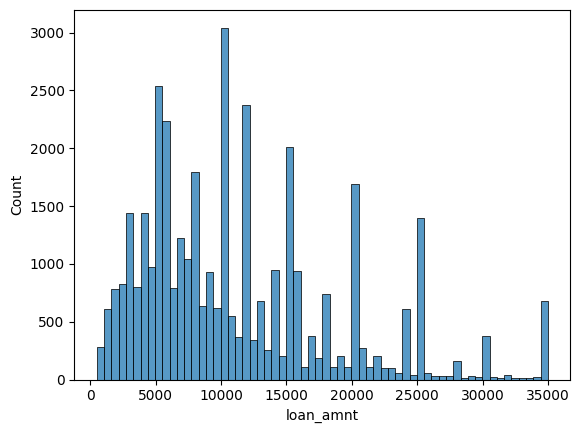

In [37]:
#checking distribution of loan amount
sns.histplot(df.loan_amnt)

In [39]:
df['loan_amnt'].describe()

count    38640.000000
mean     11292.024457
std       7462.112085
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

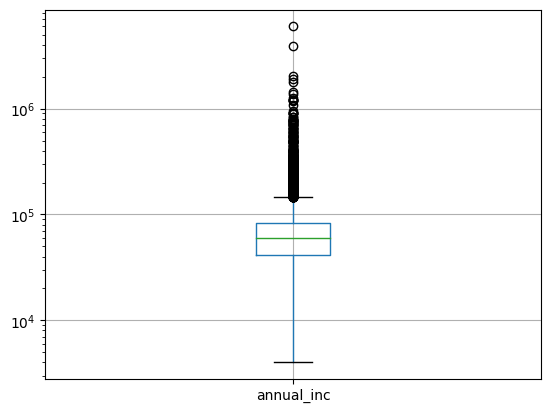

In [40]:
plt.yscale('log')
df.boxplot(column=['annual_inc']);

In [41]:
#removing rows from annual_inc after 99.5 percentile for removing the outliers
df = df[df["annual_inc"] < df["annual_inc"].quantile(0.995)]
df["annual_inc"].describe()

count     38420.000000
mean      66975.718485
std       37415.587351
min        4000.000000
25%       41004.000000
50%       60000.000000
75%       82401.000000
max      294000.000000
Name: annual_inc, dtype: float64

# 3. Data Analysis





In [42]:
#Checking Loan Status value counts
df['loan_status'].value_counts()

loan_status
Fully Paid     31951
Charged Off     5376
Current         1093
Name: count, dtype: int64

In [43]:
#As per our assumption we are not catering to current loan status as the assumption here is that a person already having a loan with the bank will not be given another loan
#so removing loan status = current

df = df[df['loan_status']!='Current']

In [44]:
#After removing current we can now convert fully paid string status to numeric 0 and charged off (defaulter) status to numeric 1
df['loan_status'] = df['loan_status'].apply(lambda x:0 if x=='Fully Paid' else 1)
df['load_status'] = df['loan_status'].apply(lambda x:pd.to_numeric(x))

In [45]:
#checking conversion to 0 and 1
df['loan_status'].value_counts()

loan_status
0    31951
1     5376
Name: count, dtype: int64

### 3a. Univeriate Analysis

In [63]:
    #Let's do a simple analysis on year wise charged off loans .remember zero means charged off

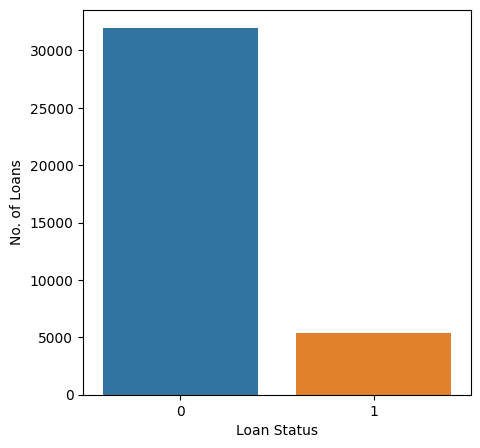

In [46]:
#No of loans charged off = 1 VS no of loans fully paid = 0
plt.figure(figsize=(5,5))
ax = sns.countplot(x="loan_status", data=df)
ax.set(xlabel='Loan Status', ylabel='No. of Loans')
plt.show()

#### Analysis of the above countplot is that there are 30000 and above fully paid loans as compared to approx 5000 default loans

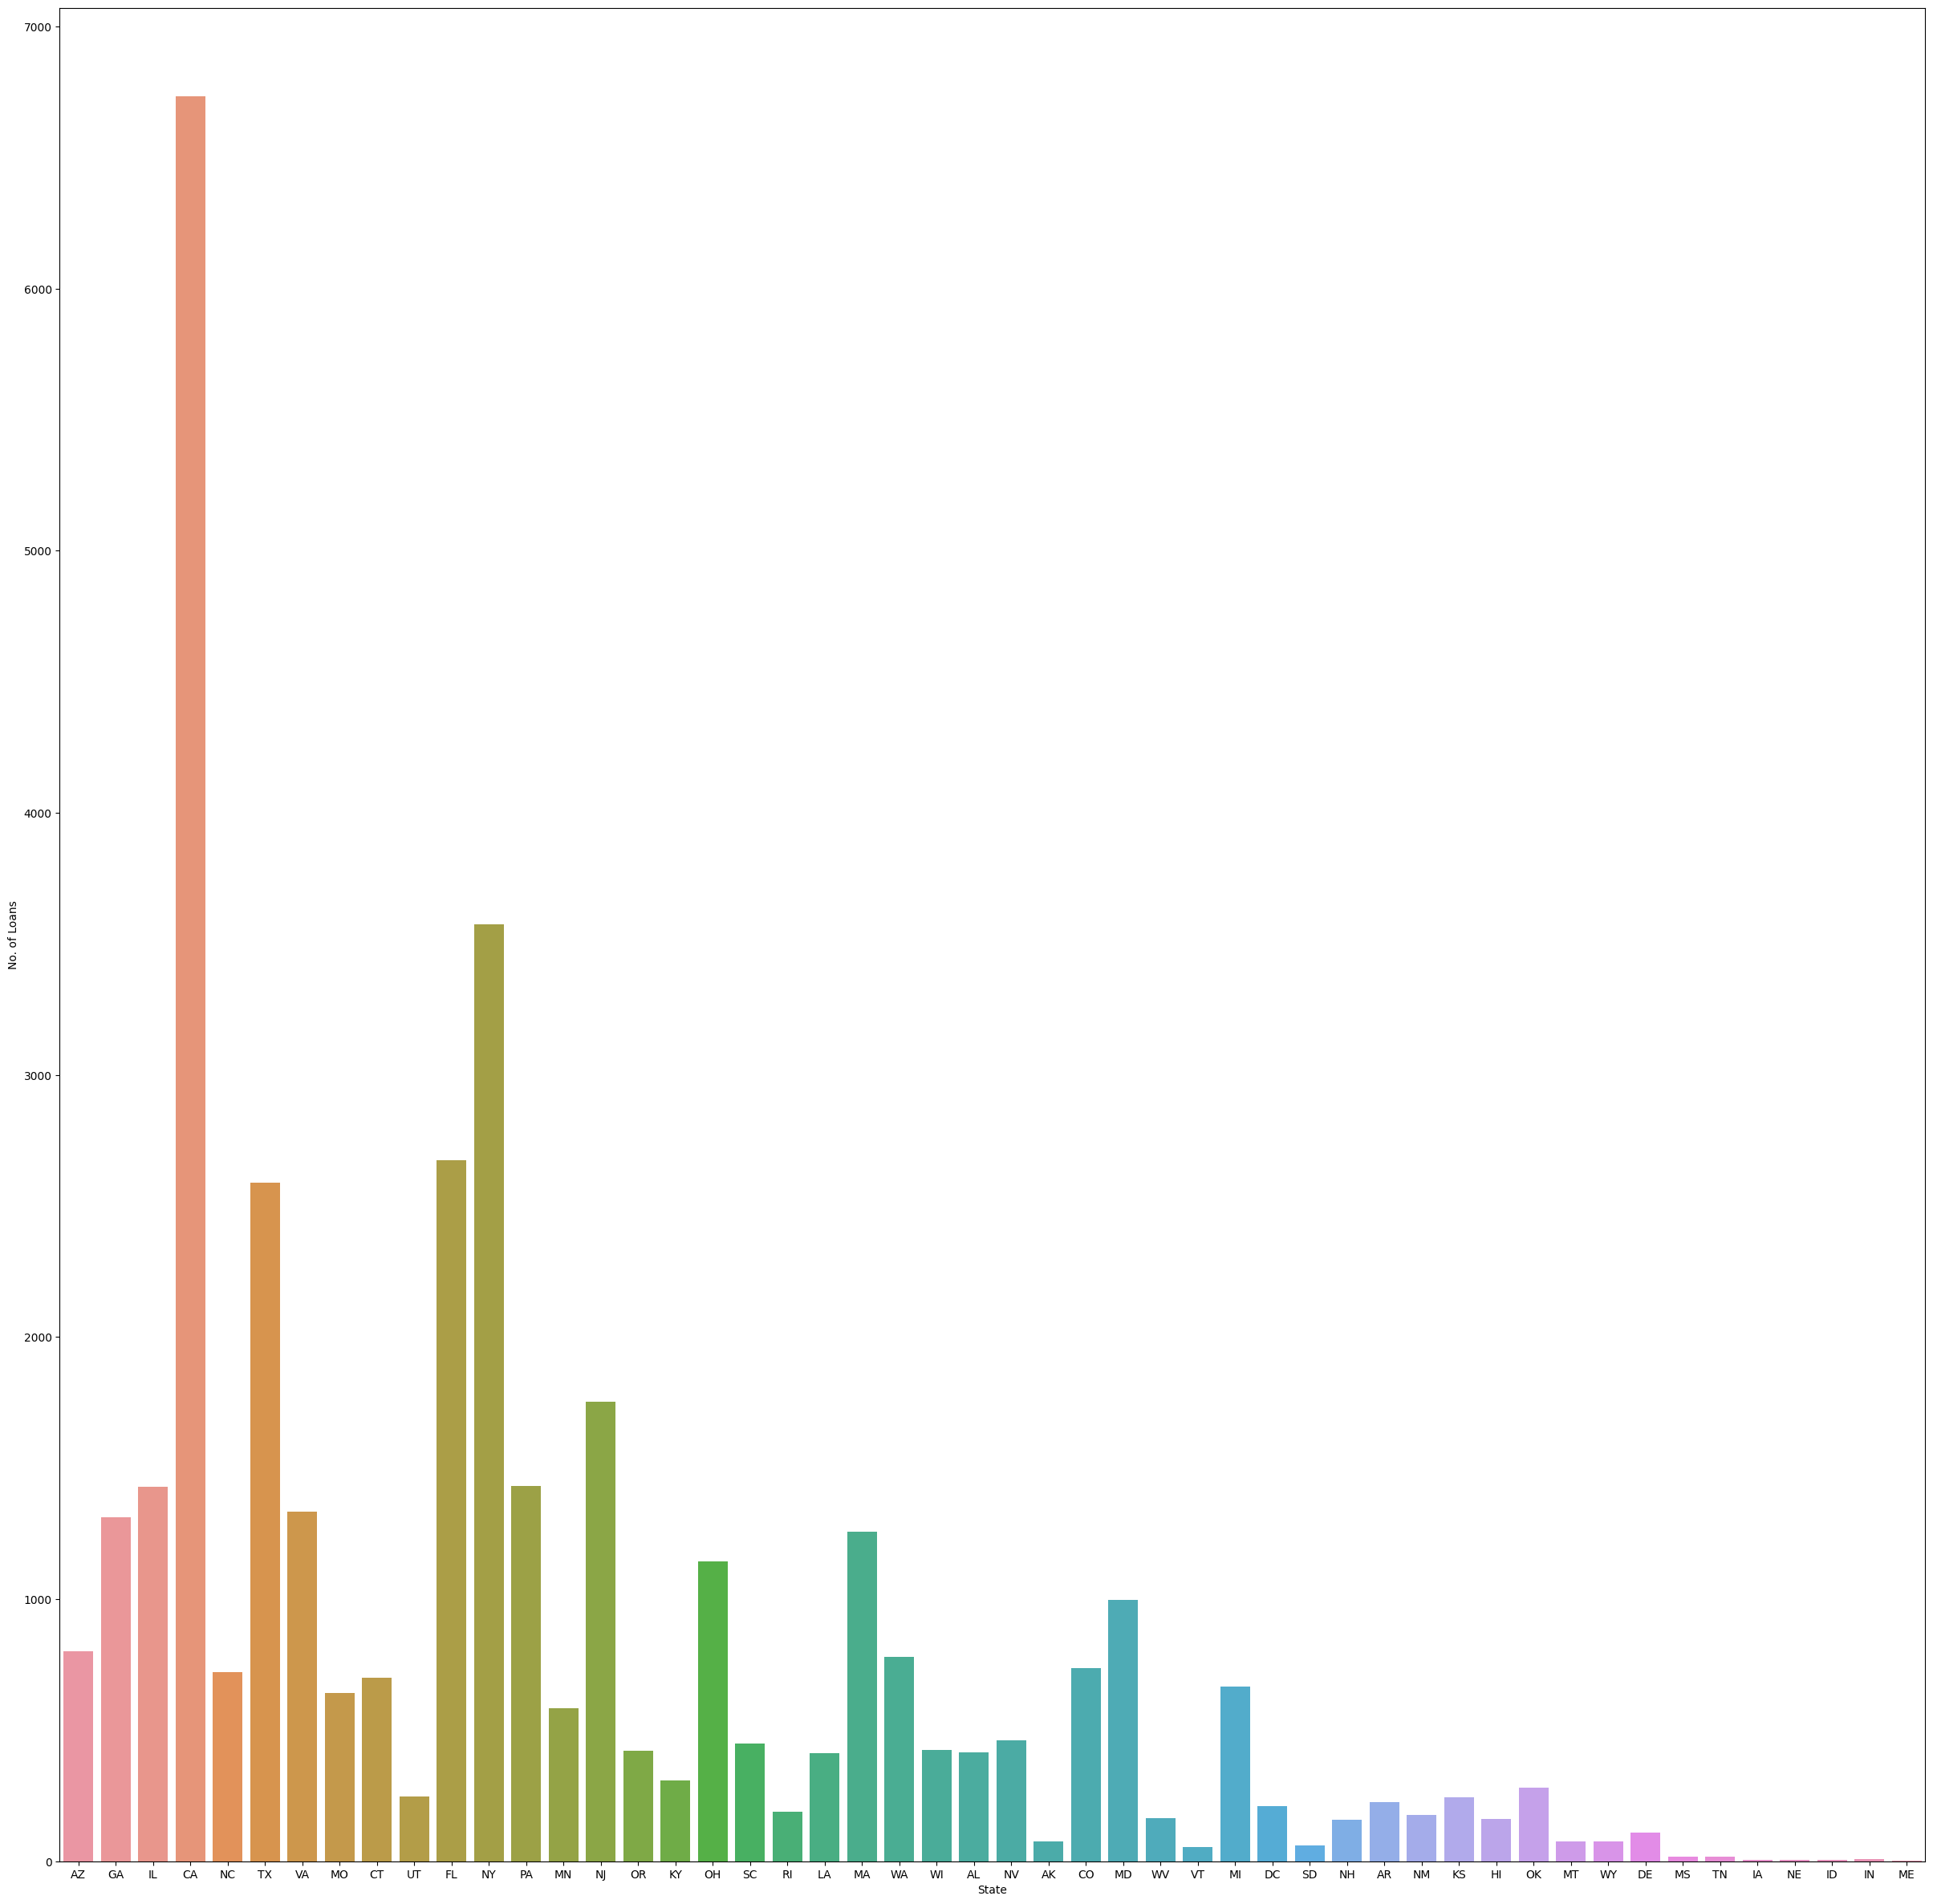

In [47]:
#States where applications are highest
plt.figure(figsize=(30,30))
ax = sns.countplot(x="addr_state", data=df)
ax.set(xlabel='State', ylabel='No. of Loans')
plt.show()

#### The states and number of applications does not really infer much about the defaulter states.California has the highest number of loans

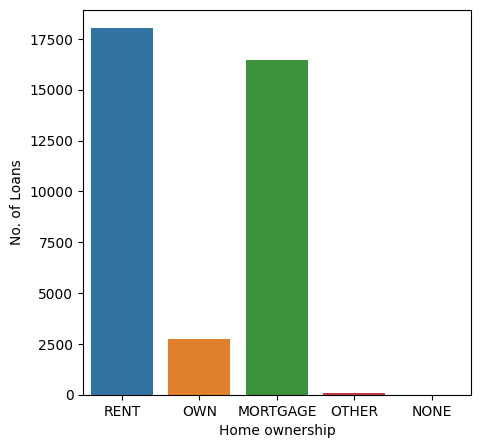

In [48]:
# no of loan applications home ownership wise
plt.figure(figsize=(5,5))
ax = sns.countplot(x="home_ownership", data=df)
ax.set(xlabel='Home ownership', ylabel='No. of Loans')
plt.show()

### Borrowers with rented homes have highest loans


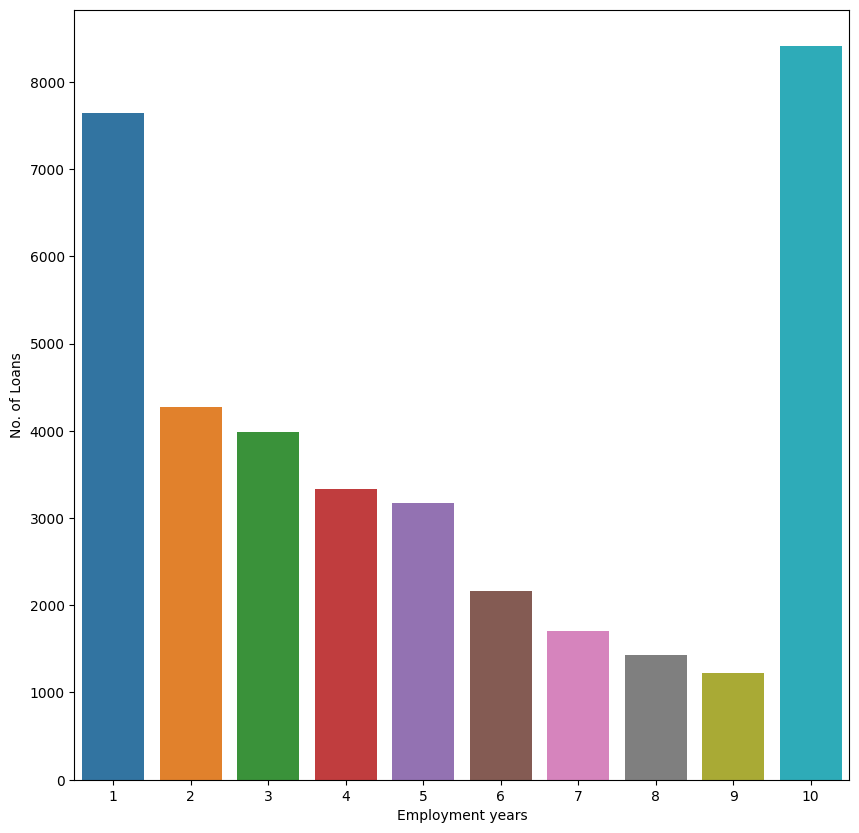

In [49]:
# no of loan applications and years of employment
plt.figure(figsize=(10,10))
ax = sns.countplot(x="emp_length", data=df)
ax.set(xlabel='Employment years', ylabel='No. of Loans')
plt.show()

### In the above bar graph we can infer that the bank is giving approximately equal number of loans to borrowers with 1 year employment and 10 year employment. 

In [50]:
#making a new dataframe for loans where status is charged off

charged_off_loans=df.loc[df['loan_status']==1]
charged_off_loans['issue_d_year']=charged_off_loans['issue_d_year'].astype(int)

#making a new dataframe for loans where status is Fully Paid
fully_paid_loans = df[df['loan_status'] ==0]
fully_paid_loans['issue_d_year']=fully_paid_loans['issue_d_year'].astype(int)

C:\Windows\Temp\ipykernel_16060\2073405454.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['issue_d_year']=charged_off_loans['issue_d_year'].astype(int)
C:\Windows\Temp\ipykernel_16060\2073405454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fully_paid_loans['issue_d_year']=fully_paid_loans['issue_d_year'].astype(int)


In [51]:
#Checking the new dataframe for charged off loans
charged_off_loans.shape

(5376, 57)

In [52]:
#Checking the new dataframe for charged off loans
charged_off_loans['issue_d_year'].head()


1     2011
8     2011
9     2011
12    2011
14    2011
Name: issue_d_year, dtype: int32

In [53]:
#Checking the new dataframe for fully paid loans
fully_paid_loans.shape

(31951, 57)

[Text(0.5, 0, 'Loan Issue Year'), Text(0, 0.5, 'No. of Loans')]

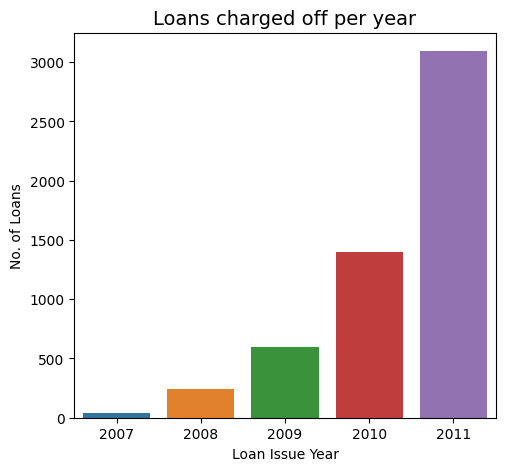

In [54]:
#year wise distribution of loans that are charged off
plt.figure(figsize=(25,5))
plt.subplot(1, 4, 1)
ax1=sns.countplot(x='issue_d_year', data=charged_off_loans)
ax1.set_title('Loans charged off per year', fontsize=14)
ax1.set(xlabel='Loan Issue Year', ylabel='No. of Loans')

### The number of default loans is increasing exponentially from 2007 to 2011 almost double each year which should be a cause of worry for the lending club

[Text(0.5, 0, 'Loan Issue Year'), Text(0, 0.5, 'No. of Loans')]

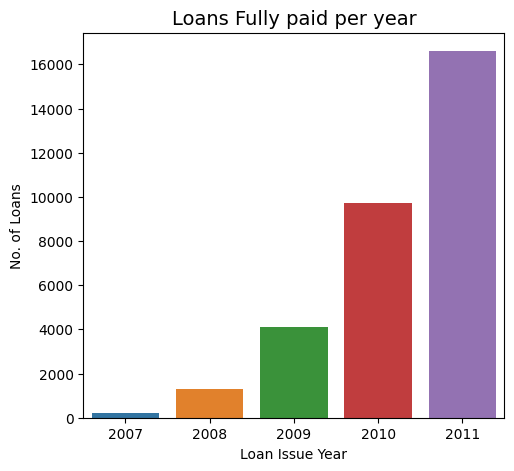

In [55]:
#year wise distribution of loans that are fully paid
plt.figure(figsize=(25,5))
plt.subplot(1, 4, 1)
ax1=sns.countplot(x='issue_d_year', data=fully_paid_loans)
ax1.set_title('Loans Fully paid per year', fontsize=14)
ax1.set(xlabel='Loan Issue Year', ylabel='No. of Loans')

### Fully paid loans are also increasing each year 

### 3b. Biveriate Analysis

In [56]:
# Let's consider two variables grade and loan_status and figure out if there is any correlation in these variables
df['loan_status'].value_counts()


loan_status
0    31951
1     5376
Name: count, dtype: int64

In [57]:
#Just Checking the Grade column
df['grade'].value_counts()


grade
B    11305
A     9626
C     7621
D     4950
E     2588
F      948
G      289
Name: count, dtype: int64

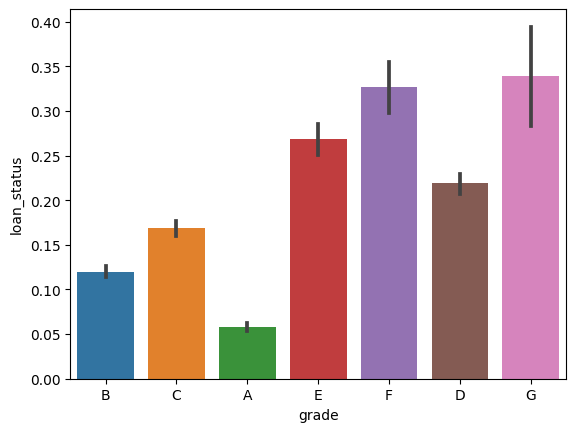

In [58]:
sns.barplot(x='grade',y='loan_status',data=df)
plt.show()

### grade and loan status indicates that for A ,B grades the loan status is fully paid as compared to F , G E and D.

### The above biveriate barplot for grade and loan status indicates that for A ,B grades the loan status is fully paid as compared to F , G E and D. so bank should give more of A,B and C graded loans.

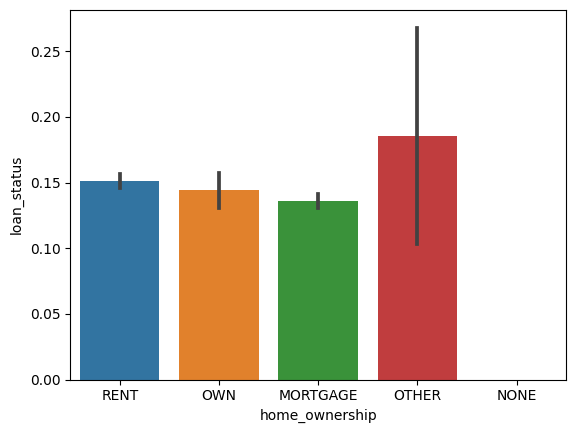

In [59]:
#Let find correlation between home ownership and loan status if any
sns.barplot(x='home_ownership',y = 'loan_status',data=df)
plt.show()

### from the above barplot we can infer there is not much variation on loan status based on the ownership type. Therefore home ownership should not be considered as a variable to identity potentially default applicants.

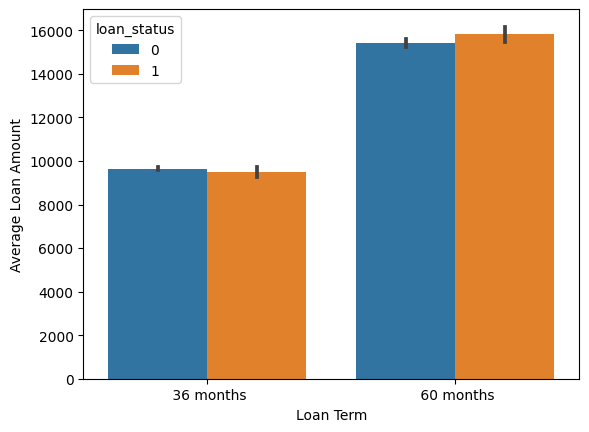

In [60]:
#term-wise distribution of charged-off and fully paid loans vs loan amount

ax = sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)
ax.set(xlabel='Loan Term', ylabel='Average Loan Amount')
plt.show()

### As we can see from the above barplot 36 months or 60 months term period does not have much impact on charged off and fully paid ratio.

In [73]:
#Converting loan_amnt to int64 as was getting an error int the function below now rectified.
df['loan_amnt'] = df['loan_amnt'].apply(np.int64)

In [74]:
#Checking min Max for creating bins (ranges) for laon amount
df['loan_amnt'].describe()

count    37327.000000
mean     11075.375733
std       7310.616859
min        500.000000
25%       5500.000000
50%       9875.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [75]:
#Converting Loan Amount ranges into high medium and low and then plotting the loan status to find any insights
def fun(n):
    if n<3000:
        return 'low'
    elif n>=3000 and n<10000:
        return 'medium'
    elif n>=10000 and n<20000:
        return 'high'
    elif n>20000:
        return 'very high'

In [76]:
df['loan_amnt']=df['loan_amnt'].apply(lambda x: fun(x))

In [77]:
#Checking the loan amount bins
df['loan_amnt'].value_counts()

loan_amnt
medium       16074
high         12994
very high     4118
low           2639
Name: count, dtype: int64

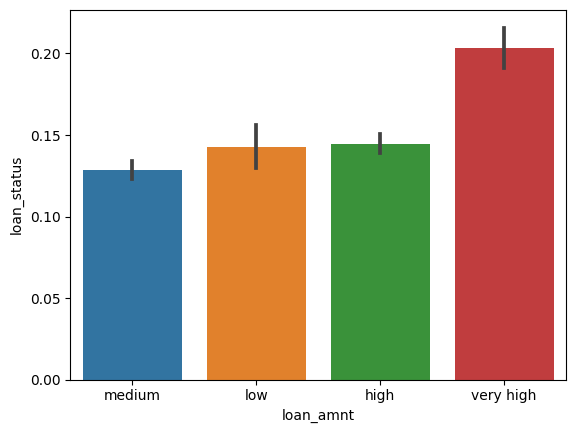

In [78]:
#Plotting loan amount and loan status based on created bins for further Analysis
sns.barplot(x='loan_amnt',y='loan_status',data=df)
plt.show()

### very high loan amount is creating more charged off loan status

In [79]:
#Looking at Annual Income and Loan Status for Analysis
df['annual_inc'].head()

0    24000.0
1    30000.0
2    12252.0
3    49200.0
5    36000.0
Name: annual_inc, dtype: float64

In [80]:
#Converting Annual income to int 
df['annual_inc'] = df['annual_inc'].apply(np.int64)
df['annual_inc'].describe()

count     37327.000000
mean      66744.481126
std       37320.093724
min        4000.000000
25%       41000.000000
50%       59500.000000
75%       82000.000000
max      294000.000000
Name: annual_inc, dtype: float64

In [81]:
def fun1(n1):
    if n1<35000:
        return 'low'
    elif n1>=35000 and n1<65000:
        return 'medium'
    elif n1>=65000 and n1<95000:
        return 'high'
    elif n1>95000:
        return 'very high'

In [82]:
df['annual_inc']=df['annual_inc'].apply(lambda x1: fun1(x1))

In [83]:
df['annual_inc'].value_counts()

annual_inc
medium       15840
high          9225
very high     6372
low           5618
Name: count, dtype: int64

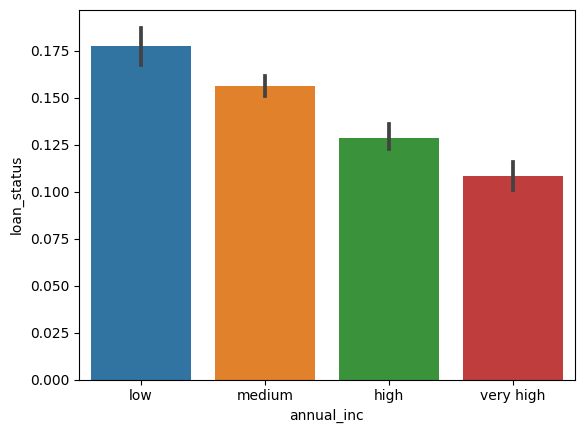

In [84]:
sns.barplot(x='annual_inc',y='loan_status',data=df)
plt.show()

#### lower the annual income higher is the default rate

# 4. Recommendation and Assumptions

### 4a. Recommendations

Following are the recommendations based on the above Analysis

1) The data provided to provide clear default profile paramaters is insufficient. Out of the 111 columns only 57 columns had meaningful data and finally ended up using only 54 columns which is approximately 50% of the columns only. Recommendation is to invest in a proper data gathering exercise and redo the Analysis

2) The following variables were analysed and compared 

For the borrower : Annual Income , Employement length and home ownership
For the Loan : Loan Amount , term of loan , grade , interest rate , Loan status

If the data for other attributes provided then Analysis can be more accurate

3) out of the total loan count of 38420 for Lending Club Bank only approximately 4% loans are charged off which indicates there is a roboust mechanism in place to identify defaulter borrower profiles

4) grade and loan status indicates that for A ,B grades the loan status is fully paid as compared to F , G E and D. so bank should give more of A,B and C graded loans.

5) Even though the percentage of total Charged off loans is 4% , it is increasing only a YOY basis . Therefore Lending Club Bank should invest in thorough Data Analysis with good quality data.

6) Home ownership of the applicant could be a good indicator for identifying defaulters. But there are many 'other' types which does not provide correct insight into the defaulter profile.

7) Loan amount and Loan status are directly correlated. As the loan amount increases charged off count also goes up so bank should avoid giving higher value loans.

8) 36 months or 60 months term period does not have much impact on charged off and fully paid ratio.So bank can go upto 60 month terms period

9) Annual income of the borrower applicant if high is able to pay off the loan and does not default. So bank should target high net worth individuals for loans.

10) The bank is giving approximately equal number of loans with 1 year employement and 10 year employment. Bank can look into increasing loans to applicants with more number of employment years as we have noticed more defaulters with less employment years.


### 4b. Assumptions

1) The data provided is of the bank at which the applicant has applied for loan. We do not have other bank data.
2) The current loan status has been ignored as the assumption here is that a person already having a loan with the bank will not be given another loan.